In [15]:
import pandas as pd
import numpy as np

In [2]:
vals = pd.read_csv('train/train_df.csv')

In [4]:
vals.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat1857,feat1858,feat1859,feat1860,feat1861,feat1862,feat1863,feat1864,feat1865,feat1866
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,16.622875,21.866266,19.688995,18.449492,21.766771,15.049737,16.677490,18.916106,16.030604,10.150430,...,15.212116,13.180254,9.620701,12.378089,12.147206,12.527977,10.204003,13.491883,11.240604,8.557930
std,0.822726,0.611312,0.284272,0.446658,0.095108,1.422904,0.677536,0.577188,0.874054,0.620695,...,0.845815,1.233018,0.982778,1.337069,1.814396,1.476630,2.762713,1.396043,0.778348,1.698210
min,13.364076,20.542028,18.968309,17.488151,21.447586,11.925737,13.912280,17.405390,12.478572,8.952604,...,12.972007,10.371236,7.452541,7.611373,7.312330,7.890099,6.531108,8.323266,8.366748,6.753923
25%,16.092570,21.363362,19.529074,18.134482,21.718832,14.125456,16.277978,18.571449,15.706372,9.751829,...,14.636505,12.438246,8.981888,11.573749,11.400902,11.767453,7.291213,12.837180,10.718357,7.238925
50%,16.775372,21.895343,19.705776,18.453629,21.779703,15.135014,16.678712,18.912313,16.157614,10.110340,...,15.398257,13.232574,9.696089,12.597885,12.523242,12.734281,10.312755,13.864075,11.270964,7.643021
75%,17.177990,22.354347,19.862149,18.746438,21.841528,16.008331,17.135410,19.294630,16.598174,10.499253,...,15.868094,13.838850,10.321080,13.253796,13.284306,13.370170,12.831150,14.429664,11.808806,9.932692
max,18.603454,23.686176,20.888440,19.681113,21.910207,18.870839,18.342050,20.149437,17.717694,11.914791,...,16.935663,17.209155,12.158398,16.072760,16.626016,16.546124,15.542546,15.667183,12.857477,13.086475


In [8]:
from sklearn.metrics import pairwise_distances
distances = pairwise_distances(vals.values[:,1:])

In [22]:
dev = vals.values[:,1:]-np.mean(vals.values[:,1:], axis=0)

In [83]:
dev_df = pd.DataFrame(np.abs(dev), index = vals.index)

In [45]:
sorted_devs = dev[np.argsort(dev, axis=0)]

In [49]:
idx = {}
for i, line in enumerate(dev):
    for j,d in enumerate(line):
        if dev[j,d]>

array([[0.5663132479305091, -1.0990630405246193, 0.21485732912073274,
        ..., -2.7075520127393737, -1.2223539057437236,
        2.2105393234428394],
       [-0.10092186715445806, 0.33030885558862266, 0.13153487639770134,
        ..., 1.2955855990991392, 0.27343152124639225, 2.3792381867395047],
       [0.3085738506016398, -0.08055333804093578, 0.09910106037289168,
        ..., 0.7353379978768224, 1.051638900115984, 2.7131432959349855],
       ...,
       [0.8179880099793557, 0.13421031228534375, 0.10852228051051682,
        ..., 2.175299747477281, 0.9022624662871284, 2.5110797781676535],
       [-0.30351644311665993, 0.065613851591106, -0.5485942948020117,
        ..., 1.120390430442681, 0.9758165816959021, 0.3896298615214864],
       [0.3797464142980367, 0.251068409801821, 0.19685151869965978, ...,
        0.5917326424782576, 0.025437971532154435, -1.6871760238205846]],
      dtype=object)

In [54]:
means = vals.describe().loc['mean'].values

In [55]:
stds = vals.describe().loc['std'].values

In [56]:
prop_outliers = np.abs(dev) - 2*stds > 0

In [72]:
len(np.nonzero(prop_outliers)[0])

Wall time: 6.95 ms


In [102]:
rates = np.abs(dev).max(axis=0)/stds

In [147]:
outliers = {}
freq = 1000

for i in range(freq):
    threshold = i/freq
    outliers[threshold] = len(np.nonzero(np.abs(dev) - threshold*rates*stds > 0)[0])

In [150]:
prop_out = pd.DataFrame(np.array(list(outliers.values())),index=np.array(list(outliers.keys())))

In [149]:
len(np.nonzero(rates>2)[0])

1834

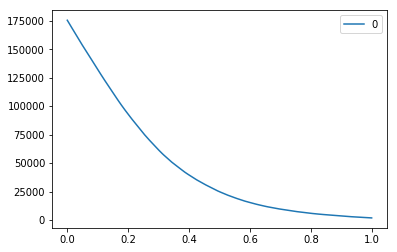

In [190]:
prop_out.plot()

In [162]:
filt = np.nonzero(rates>2)[0]
dev_filt = dev[:,filt]

In [163]:
rates_filt = rates[filt]
stds_filt = stds[filt]

In [170]:
threshold = 0.999
prop_outliers = np.nonzero(np.abs(dev) - threshold*rates*stds > 0)

In [178]:
out_filt = []
for i,j in zip(*prop_outliers):
    if j in filt:
        out_filt.append(np.array([i,j]))
out_filt = np.array(out_filt)

In [183]:
out_filt

(1844, 2)

In [198]:
import pandas as pd
import numpy as np

def detect_spectr_outliers(filepath, threshold = 0.999, level = 2):
    vals = pd.read_csv(filepath)
    dev = np.abs(vals.values[:,1:]-np.mean(vals.values[:,1:], axis=0))
    desc = vals.describe()
    means = desc.loc['mean'].values
    stds = desc.loc['std'].values
    rates = np.abs(dev).max(axis=0)/stds
    prop_outliers = np.nonzero(np.abs(dev) - threshold*rates*stds > 0)
    filt = np.nonzero(rates>level)[0]
    out_filt = []
    for i,j in zip(*prop_outliers):
        if j in filt:
            out_filt.append(np.array([i,j]))
    out_filt = np.array(out_filt)
    
    return out_filt

In [199]:
f_test = detect_spectr_outliers('train/train_df.csv')